# Part-3 Advanced Matplotlib
----
### Task (use sample_data.csv from class notes for 3D plot)
----
# Tasks 3.1 Reusable Plotting Function
## Define a function that accepts a DataFrame, an x_col, and a y_col as arguments.
## The functions should create a scatter plot with appropriate labels and a grid.
## Call the function with different pairs of columns to verify reusability.

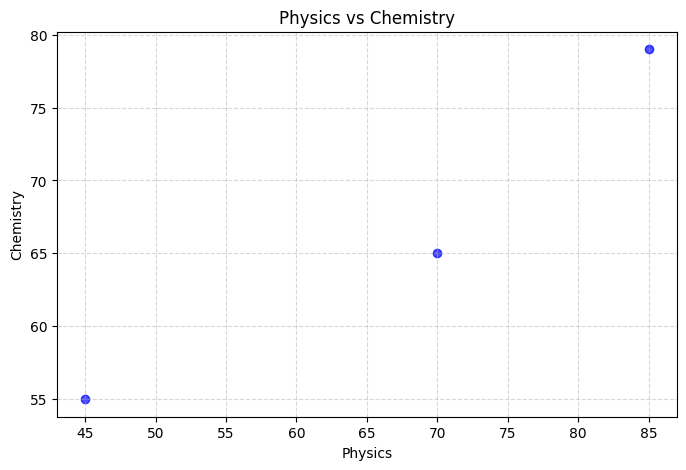

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_scatter(df, x_col, y_col, title="Scatter Plot", xlabel=None, ylabel=None, color='blue', alpha=0.7):
    """
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        x_col (str): Column name for X-axis.
        y_col (str): Column name for Y-axis.
        title (str): Plot title (default: "Scatter Plot").
        xlabel (str): X-axis label (default: x_col).
        ylabel (str): Y-axis label (default: y_col).
        color (str): Marker color (default: 'blue').
        alpha (float): Marker transparency (default: 0.7).
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(df[x_col], df[y_col], color=color, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else y_col)
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()

import pandas as pd
data = {'Physics': [85, 45, 70], 'Chemistry': [79, 55, 65]}
df = pd.DataFrame(data)
plot_scatter(df, 'Physics', 'Chemistry', title="Physics vs Chemistry")

# Task 3.2. Subplots in Matplotlib

## • Create two or more subplots in a single figure using plt.subplot() or plt.subplots().
## • Plot different relationships in each subplot (plot some mathematical function or use some of your datasets).
## • Make sure each subplot has titles and axis labels.

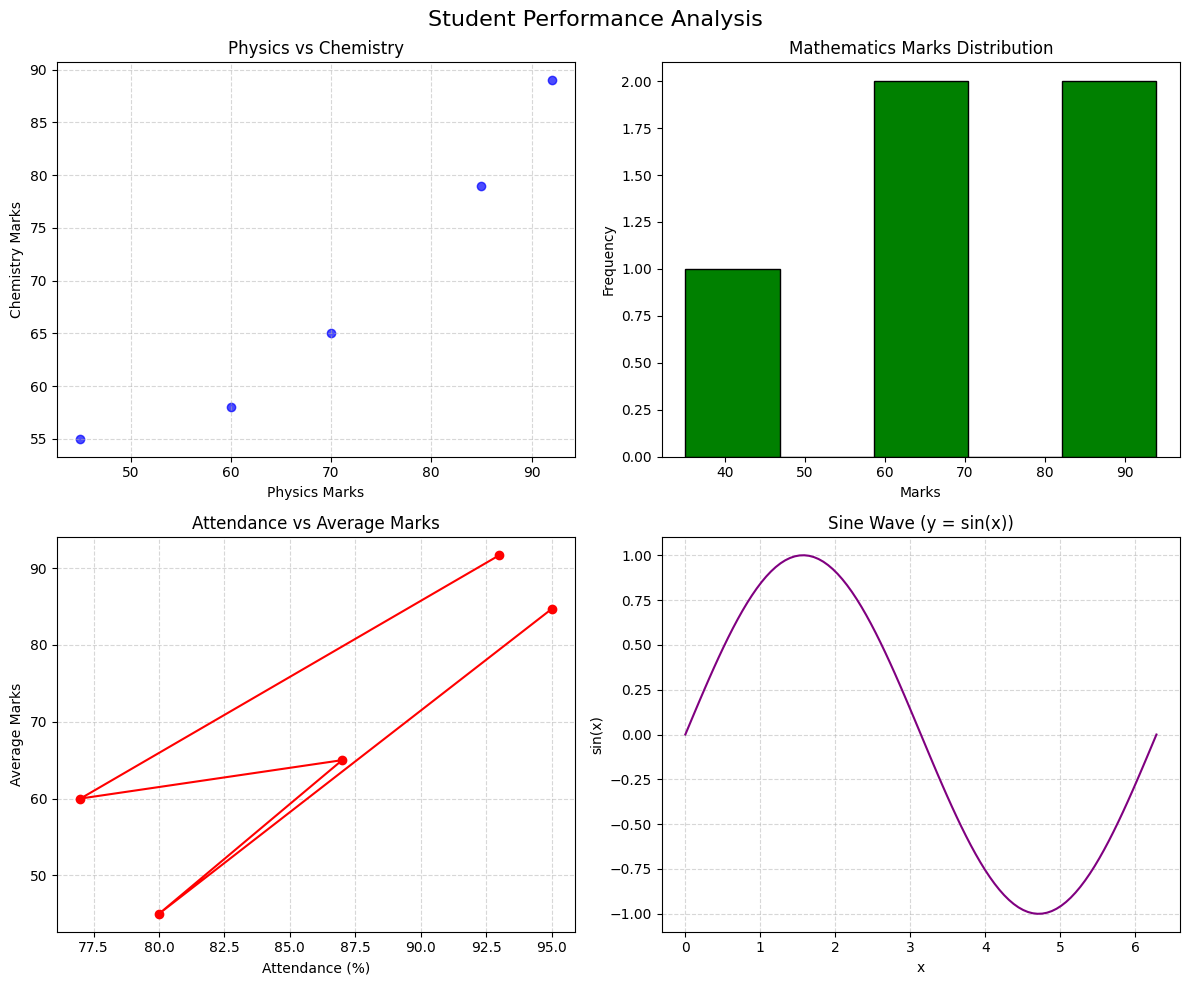

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample DataFrame (replace with your data)
data = {
    'Physics': [85, 45, 70, 60, 92],
    'Chemistry': [79, 55, 65, 58, 89],
    'Mathematics': [90, 35, 60, 62, 94],
    'Attendance': [95, 80, 87, 77, 93]
}
df = pd.DataFrame(data)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Student Performance Analysis", fontsize=16)

# --- Subplot 1: Physics vs Chemistry (Scatter) ---
axes[0, 0].scatter(df['Physics'], df['Chemistry'], color='blue', alpha=0.7)
axes[0, 0].set_title("Physics vs Chemistry")
axes[0, 0].set_xlabel("Physics Marks")
axes[0, 0].set_ylabel("Chemistry Marks")
axes[0, 0].grid(linestyle='--', alpha=0.5)

# --- Subplot 2: Mathematics Distribution (Histogram) ---
axes[0, 1].hist(df['Mathematics'], bins=5, color='green', edgecolor='black')
axes[0, 1].set_title("Mathematics Marks Distribution")
axes[0, 1].set_xlabel("Marks")
axes[0, 1].set_ylabel("Frequency")

# --- Subplot 3: Attendance vs Average (Line Plot) ---
df['Average'] = df[['Physics', 'Chemistry', 'Mathematics']].mean(axis=1)
axes[1, 0].plot(df['Attendance'], df['Average'], marker='o', color='red')
axes[1, 0].set_title("Attendance vs Average Marks")
axes[1, 0].set_xlabel("Attendance (%)")
axes[1, 0].set_ylabel("Average Marks")
axes[1, 0].grid(linestyle='--', alpha=0.5)

# --- Subplot 4: Sine Wave (Mathematical Function) ---
x = np.linspace(0, 2*np.pi, 100)
axes[1, 1].plot(x, np.sin(x), color='purple')
axes[1, 1].set_title("Sine Wave (y = sin(x))")
axes[1, 1].set_xlabel("x")
axes[1, 1].set_ylabel("sin(x)")
axes[1, 1].grid(linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Task 3.3. Error Handling with Try and Raise

## • Write code that reads a file using pd.read csv().
## • Use try-except blocks to handle FileNotFoundError or ParserError.
## • Raise a ValueError if the specified columns do not exist in the DataFrame.


In [12]:
import pandas as pd

# Create sample student data
sample_data = {
    'Name': ['Aman', 'Boman', 'Raman', 'Sneha', 'Manjisha', 'Sumiran', 'Sumit', 'Parash'],
    'Age': [20, 18, 16, 19, 17, 18, 17, 18],
    'Gender': ['Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male'],
    'City': ['Kathmandu', 'Pokhara', 'Lalitpur', 'Dharan', 'Biratnagar', 'Kathmandu', 'Pokhara', 'Lalitpur'],
    'Physics': [85, 45, 70, 60, 92, 70, 78, 30],
    'Chemistry': [79, 55, 65, 58, 89, 85, 90, 20],
    'Mathematics': [90, 35, 60, 62, 94, 70, 86, 35],
    'Attendance': [95, 80, 87, 77, 93, 60, 98, 21]
}

# Save it to 'student_data.csv'
df = pd.DataFrame(sample_data)
df.to_csv("student_data.csv", index=False)


In [13]:
import pandas as pd

def load_student_data(filepath, required_columns):
    try:
        df = pd.read_csv(filepath)
        print(f"File '{filepath}' loaded successfully.")

        missing_cols = [col for col in required_columns if col not in df.columns]
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")

        return df

    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
    except pd.errors.ParserError:
        print(f"Error: Failed to parse '{filepath}'. Please check the file format.")
    except ValueError as ve:
        print(f"Validation Error: {ve}")

required_columns = ['Physics', 'Chemistry', 'Mathematics', 'Attendance']
df = load_student_data("student_data.csv", required_columns)


File 'student_data.csv' loaded successfully.


# Task 3.4. 3D Plot with Matplotlib

## • Use mpl toolkits.mplot3d to create a 3D scatter plot of three numerical columns.
## • Color the data points using a fourth column with a colormap.
## • Add axis labels and a color bar.

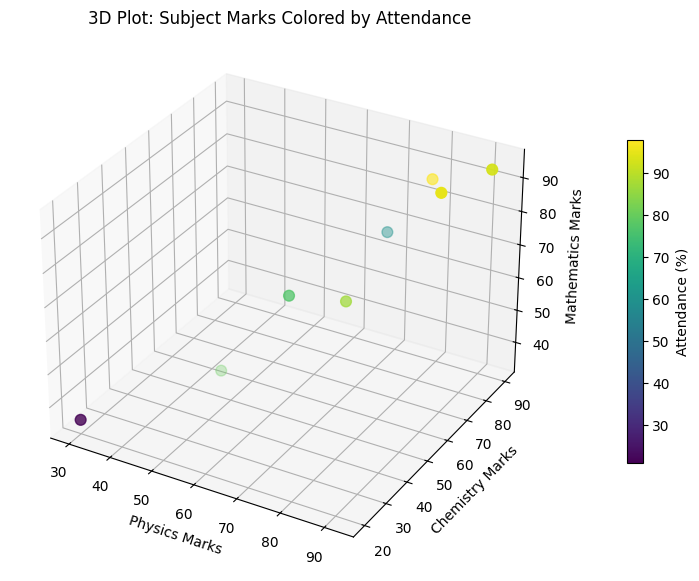

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv("student_data.csv")

# Extract numerical columns
x = df['Physics']
y = df['Chemistry']
z = df['Mathematics']
color = df['Attendance']  # This will define the color of each point

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colormap
sc = ax.scatter(x, y, z, c=color, cmap='viridis', s=60)

# Axis labels
ax.set_xlabel("Physics Marks")
ax.set_ylabel("Chemistry Marks")
ax.set_zlabel("Mathematics Marks")
ax.set_title("3D Plot: Subject Marks Colored by Attendance")

# Add color bar for Attendance
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label("Attendance (%)")

plt.show()


Part 4 - LaTeX
Tasks
Task 4.1. Bulid a 2 page LATEX CV of yours, use any template.

4

Part 5 - GitHub
Tasks
Task 5.1. Commit assignment 1 and 2 related files to your GitHub repo, which is

shared with me.
Happy Learning!
— Dr. Rajesh Kumar, Mentor – Summer Internship in Computational Nuclear